<a href="https://colab.research.google.com/github/Ichigoboy12/AI/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Define the XOR dataset
X = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
y = torch.tensor([[0.0], [1.0], [1.0], [0.0]])


# Define the neural network with a 2-2-1 architecture
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 2)  # Input to hidden layer
        self.output = nn.Linear(2, 1)  # Hidden to output layer
        self.init_weights()

    def init_weights(self):
        # Initialize weights using Xavier initialization
        nn.init.xavier_uniform_(self.hidden.weight)
        nn.init.zeros_(self.hidden.bias)
        nn.init.xavier_uniform_(self.output.weight)
        nn.init.zeros_(self.output.bias)

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))  # Activation for hidden layer
        x = torch.sigmoid(self.output(x))  # Activation for output layer
        return x

# Initialize the network, define the loss function, and optimizer
model = XORNet()
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent

hidden_weights = []
output_weights = []
loss_history = []
# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    hidden_weights.append(model.hidden.weight.data.clone().numpy())
    output_weights.append(model.output.weight.data.clone().numpy())
    loss_history.append(loss.item())

    # Print loss every 1000 epochs
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

hidden_weights = np.array(hidden_weights)
output_weights = np.array(output_weights)


# Test the trained model
with torch.no_grad():
    predictions = model(X)
    print("\nPredictions : Targets:")
    for i in range(len(X)):
        print(f"Input: {X[i].tolist()}, Prediction: {predictions[i].item():.4f}, Target: {y[i].item()} ")


Epoch [1000/10000], Loss: 0.2484
Epoch [2000/10000], Loss: 0.2429
Epoch [3000/10000], Loss: 0.2270
Epoch [4000/10000], Loss: 0.1945
Epoch [5000/10000], Loss: 0.1241
Epoch [6000/10000], Loss: 0.0512
Epoch [7000/10000], Loss: 0.0253
Epoch [8000/10000], Loss: 0.0156
Epoch [9000/10000], Loss: 0.0109
Epoch [10000/10000], Loss: 0.0083

Predictions : Targets:
Input: [0.0, 0.0], Prediction: 0.1008, Target: 0.0 
Input: [0.0, 1.0], Prediction: 0.9092, Target: 1.0 
Input: [1.0, 0.0], Prediction: 0.9172, Target: 1.0 
Input: [1.0, 1.0], Prediction: 0.0884, Target: 0.0 


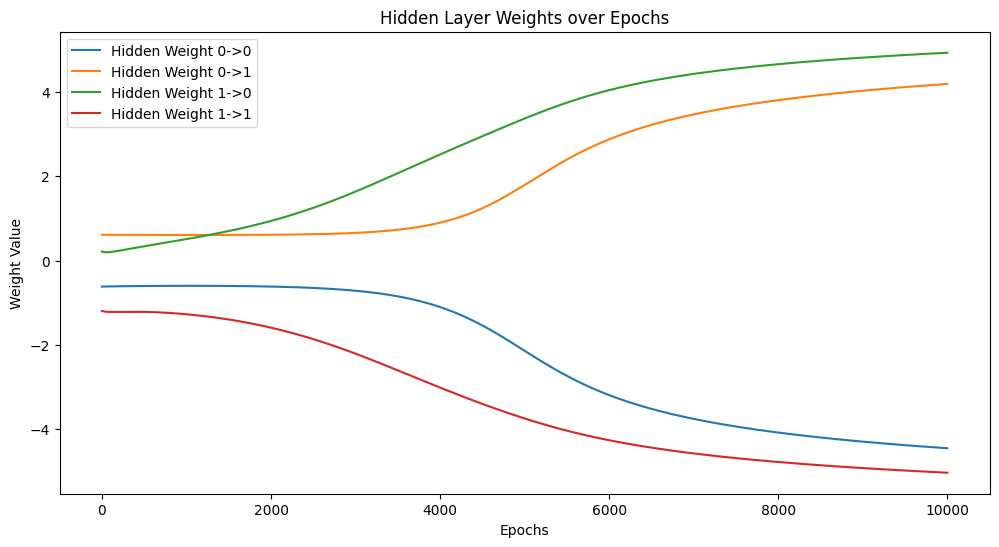

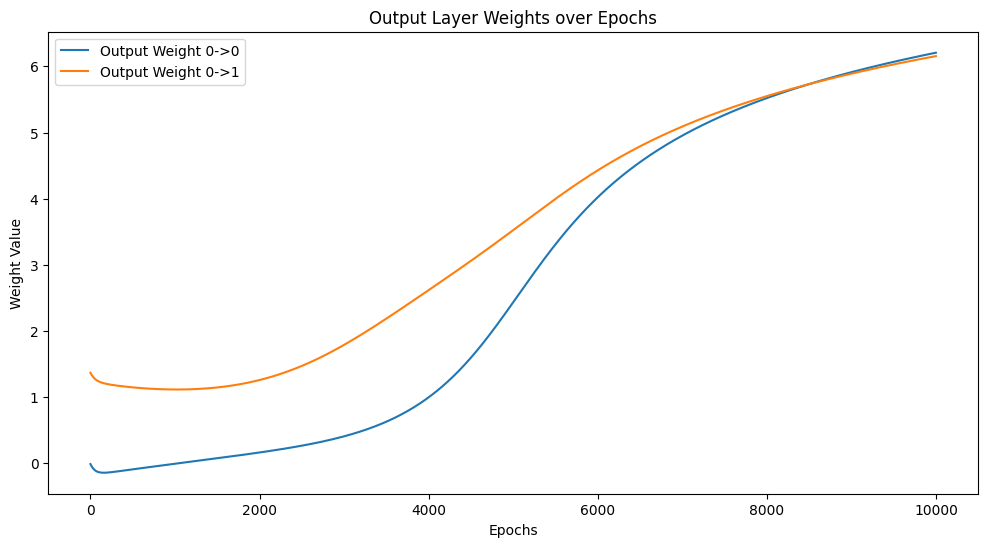

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(hidden_weights.shape[1]):
    for j in range(hidden_weights.shape[2]):
        plt.plot(hidden_weights[:, i, j], label=f"Hidden Weight {i}->{j}")
plt.title("Hidden Layer Weights over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Weight Value")
plt.legend()
plt.show()

# Plot output layer weights
plt.figure(figsize=(12, 6))
for i in range(output_weights.shape[1]):
    for j in range(output_weights.shape[2]):
        plt.plot(output_weights[:, i, j], label=f"Output Weight {i}->{j}")
plt.title("Output Layer Weights over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Weight Value")
plt.legend()
plt.show()


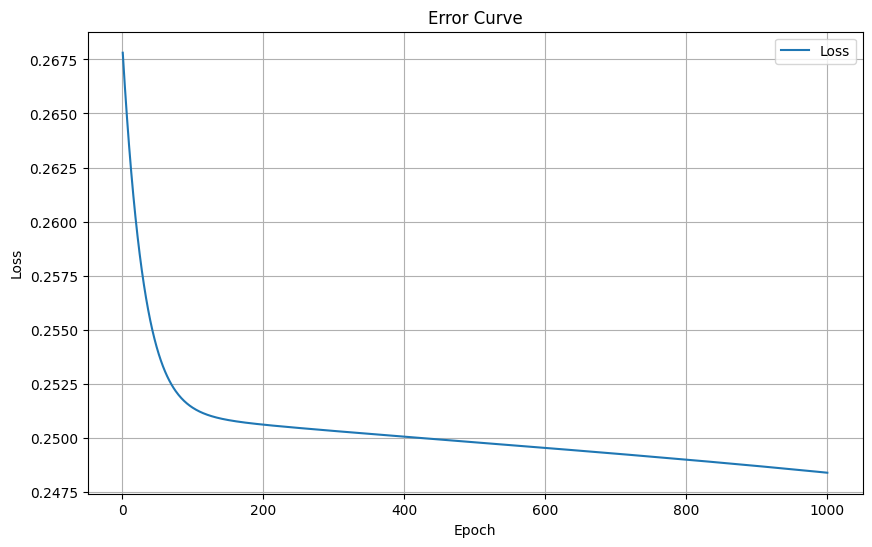

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), loss_history[:1000], label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Error Curve")
plt.grid(True)
plt.legend()
plt.show()


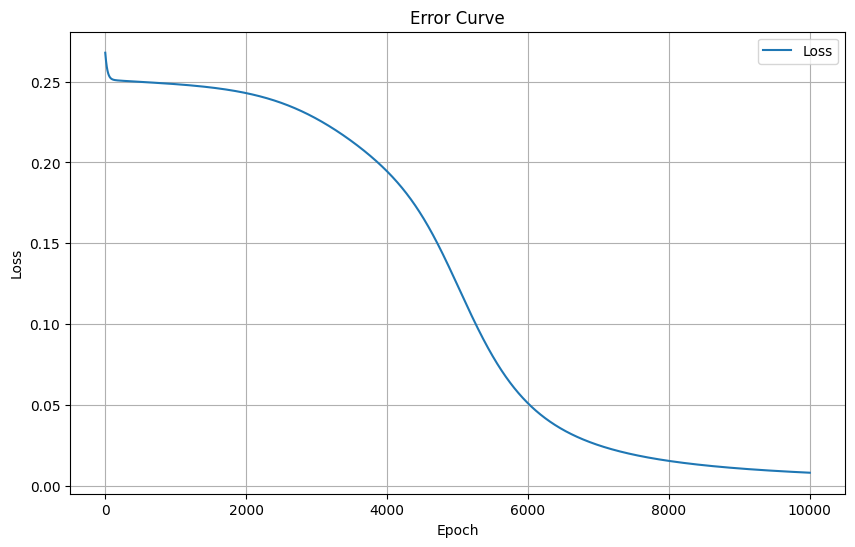

In [ ]:
# Plot the error curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), loss_history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Error Curve")
plt.grid(True)
plt.legend()
plt.show()


Epoch [1000/10000], Loss: 0.003030
Epoch [2000/10000], Loss: 0.000731
Epoch [3000/10000], Loss: 0.000301
Epoch [4000/10000], Loss: 0.000149
Epoch [5000/10000], Loss: 0.000080
Epoch [6000/10000], Loss: 0.000046
Epoch [7000/10000], Loss: 0.000026
Epoch [8000/10000], Loss: 0.000016
Epoch [9000/10000], Loss: 0.000009
Epoch [10000/10000], Loss: 0.000006

Predictions : Targets:
Input: [0.0, 0.0], Prediction: 0.0025, Target: 0.0
Input: [0.0, 1.0], Prediction: 0.9977, Target: 1.0
Input: [1.0, 0.0], Prediction: 0.9977, Target: 1.0
Input: [1.0, 1.0], Prediction: 0.0023, Target: 0.0


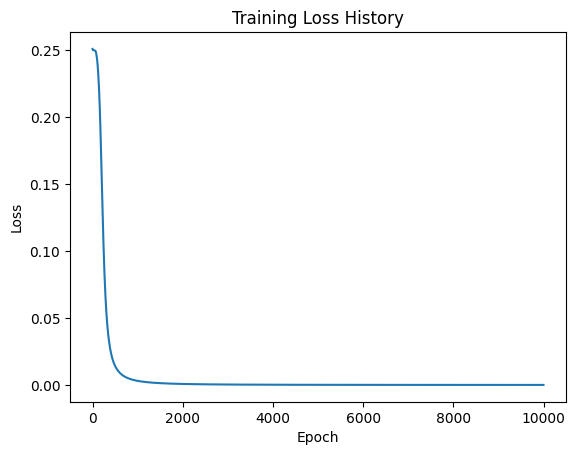

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Define the XOR dataset
X = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
y = torch.tensor([[0.0], [1.0], [1.0], [0.0]])


# Define the neural network with a 2-2-1 architecture
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 2)  # Input to hidden layer
        self.output = nn.Linear(2, 1)  # Hidden to output layer
        self.init_weights()

    def init_weights(self):
        # Initialize weights using Xavier initialization
        nn.init.xavier_uniform_(self.hidden.weight)
        nn.init.zeros_(self.hidden.bias)
        nn.init.xavier_uniform_(self.output.weight)
        nn.init.zeros_(self.output.bias)

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))  # Activation for hidden layer
        x = torch.sigmoid(self.output(x))  # Activation for output layer
        return x


# Initialize the network, define the loss function, and optimizer
model = XORNet()
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer

loss_history = []

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    # Print loss every 1000 epochs
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.6f}")

# Test the trained model
with torch.no_grad():
    predictions = model(X)
    print("\nPredictions : Targets:")
    for i in range(len(X)):
        print(f"Input: {X[i].tolist()}, Prediction: {predictions[i].item():.4f}, Target: {y[i].item()}")

# Optionally, plot the loss history
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.show()
